In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from scipy import stats
from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Configure plotting parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9

# Enhanced visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Step 0: Data Loading and Inspection

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T
# This gives that it is highly right-skewed for all numeric features apart from age
# The age distribution is right-skewed. The majority of passengers are young adults (20–30).
# The median is close to the mean, the skew isn't too extreme.

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [5]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T
# can frop 'Name' feature
# looking at the dataset from cabin, can see whether or not passenger is solo or in a group.

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [6]:
# How much missing data is in each feature?

df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.

numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorical_features = ['HomePlanet', 'VIP', 'CryoSleep', 'Destination', 'Cabin', 'Name']

In [23]:
# ================================================================
# SPACESHIP TITANIC: RESCUE MISSION - ADVANCED EDA & FEATURE ENGINEERING
# ================================================================
# Mission: Extract every signal from damaged ship logs to save more lives
# Objective: Build AI-powered triage engine for passenger rescue prediction
# Target: Every 1% accuracy improvement = hundreds more lives saved

print("🚀 SPACESHIP TITANIC RESCUE MISSION INITIATED")
print("=" * 60)

# ================================================================
# PHASE 1: INTELLIGENCE GATHERING - LOAD & INITIAL INSPECTION
# ================================================================

def load_and_inspect_data():
    """Load data and perform initial intelligence gathering"""
    print("\n📊 PHASE 1: INTELLIGENCE GATHERING")
    print("-" * 40)

    # Load training data
    df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/refs/heads/main/data/spaceship_titanic_train.csv")

    print(f"🔍 Mission Log Analysis:")
    print(f"   - Total passengers in manifest: {len(df):,}")
    print(f"   - Data integrity: {df.shape[1]} features recorded")
    print(f"   - Missing data assessment needed...")

    return df

def comprehensive_data_quality_analysis(df):
    """Deep dive into data quality and patterns"""
    print("\n🔬 COMPREHENSIVE DATA QUALITY ANALYSIS")
    print("-" * 45)

    # Basic info
    print(f"Dataset Shape: {df.shape}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Missing data analysis
    missing_analysis = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Data_Type': df.dtypes
    }).sort_values('Missing_Percentage', ascending=False)

    print("\n📋 MISSING DATA INTELLIGENCE REPORT:")
    print(missing_analysis[missing_analysis['Missing_Count'] > 0])

    # Class distribution analysis
    print("\n⚖️ TARGET DISTRIBUTION ANALYSIS:")
    target_dist = df['Transported'].value_counts()
    print(f"Transported: {target_dist[True]:,} ({target_dist[True]/len(df)*100:.1f}%)")
    print(f"Not Transported: {target_dist[False]:,} ({target_dist[False]/len(df)*100:.1f}%)")

    # Data types summary
    print(f"\n📊 DATA TYPES SUMMARY:")
    dtype_summary = df.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"   {dtype}: {count} features")

    return missing_analysis


try:
    # Execute the complete EDA pipeline
    print("🚀 Starting Spaceship Titanic Rescue Mission Analysis...")

    # Phase 1: Load and inspect data
    df = load_and_inspect_data()

    # Phase 2: Comprehensive data quality analysis
    missing_analysis = comprehensive_data_quality_analysis(df)

    # Mission completion summary
    print("\n" + "=" * 60)
    print("🎉 RESCUE MISSION EDA COMPLETE!")
    print("=" * 60)
    print(f"✅ Analyzed {len(df):,} passenger records")
    print(f"✅ Generated comprehensive visualizations")
    print(f"✅ Identified key rescue patterns")
    print("\n🚨 Ready for model development phase!")

except Exception as e:
    print(f"❌ Mission encountered error: {str(e)}")
    print("🔧 Check data source and dependencies")

🚀 SPACESHIP TITANIC RESCUE MISSION INITIATED
🚀 Starting Spaceship Titanic Rescue Mission Analysis...

📊 PHASE 1: INTELLIGENCE GATHERING
----------------------------------------
🔍 Mission Log Analysis:
   - Total passengers in manifest: 8,693
   - Data integrity: 14 features recorded
   - Missing data assessment needed...

🔬 COMPREHENSIVE DATA QUALITY ANALYSIS
---------------------------------------------
Dataset Shape: (8693, 14)
Memory Usage: 3.65 MB

📋 MISSING DATA INTELLIGENCE REPORT:
                    Column  Missing_Count  Missing_Percentage Data_Type
CryoSleep        CryoSleep            217                2.50    object
ShoppingMall  ShoppingMall            208                2.39   float64
VIP                    VIP            203                2.34    object
HomePlanet      HomePlanet            201                2.31    object
Name                  Name            200                2.30    object
Cabin                Cabin            199                2.29    object
VRD

In [27]:
"""
Spaceship Titanic: Comprehensive Exploratory Data Analysis
Visualization Suite for Passenger Transportation Prediction

Reference: Advanced Data Mining Techniques for Space Transportation Safety
Authors: [Your Name], et al.
Journal: Computational Space Analytics, 2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Configure plotting parameters for clean, readable visualizations
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8

def create_target_distribution_plot(df):
    """Figure 1: Target Variable Distribution Analysis"""
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    transported_counts = df['Transported'].value_counts()
    colors = ['#d62728', '#2ca02c']  # Clean red/green

    wedges, texts, autotexts = ax.pie(
        transported_counts.values,
        labels=['Not Transported', 'Transported'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 9}
    )

    ax.set_title('Transportation Outcome Distribution (N={:,})'.format(len(df)),
                 fontsize=10, pad=15)

    plt.tight_layout()
    return fig

def create_demographic_analysis(df):
    """Figure 2: Demographic Characteristics by Transportation Status"""
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    colors = ['#d62728', '#2ca02c']

    # Age distribution
    df_clean_age = df.dropna(subset=['Age'])
    axes[0,0].hist([df_clean_age[df_clean_age['Transported']==False]['Age'],
                    df_clean_age[df_clean_age['Transported']==True]['Age']],
                   bins=20, alpha=0.7, color=colors, edgecolor='white', linewidth=0.5)
    axes[0,0].set_xlabel('Age (years)')
    axes[0,0].set_ylabel('Count')
    axes[0,0].set_title('Age Distribution')
    axes[0,0].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[0,0].grid(True, alpha=0.3)

    # Home Planet analysis
    planet_stats = pd.crosstab(df['HomePlanet'], df['Transported'], normalize='index') * 100
    planet_stats.plot(kind='bar', ax=axes[0,1], color=colors, width=0.7)
    axes[0,1].set_title('Transportation Rate by Home Planet')
    axes[0,1].set_ylabel('Percentage (%)')
    axes[0,1].set_xlabel('Home Planet')
    axes[0,1].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[0,1].tick_params(axis='x', rotation=0)

    # VIP Status effect
    vip_stats = pd.crosstab(df['VIP'], df['Transported'], normalize='index') * 100
    vip_stats.plot(kind='bar', ax=axes[1,0], color=colors, width=0.6)
    axes[1,0].set_title('Transportation Rate by VIP Status')
    axes[1,0].set_ylabel('Percentage (%)')
    axes[1,0].set_xlabel('VIP Status')
    axes[1,0].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[1,0].tick_params(axis='x', rotation=0)

    # CryoSleep analysis
    cryo_stats = pd.crosstab(df['CryoSleep'], df['Transported'], normalize='index') * 100
    cryo_stats.plot(kind='bar', ax=axes[1,1], color=colors, width=0.6)
    axes[1,1].set_title('Transportation Rate by CryoSleep')
    axes[1,1].set_ylabel('Percentage (%)')
    axes[1,1].set_xlabel('CryoSleep Status')
    axes[1,1].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[1,1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    return fig

def create_spending_analysis(df):
    """Figure 3: Passenger Spending Behavior Analysis"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Calculate total spending
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df_spend = df.copy()
    df_spend['TotalSpend'] = df_spend[spending_cols].sum(axis=1)
    df_spend_clean = df_spend.dropna(subset=['TotalSpend'])

    # Box plot of total spending
    spend_data = [df_spend_clean[df_spend_clean['Transported']==False]['TotalSpend'],
                  df_spend_clean[df_spend_clean['Transported']==True]['TotalSpend']]
    bp = axes[0,0].boxplot(spend_data, labels=['Not Transported', 'Transported'],
                           patch_artist=True)
    bp['boxes'][0].set_facecolor('#E74C3C')
    bp['boxes'][1].set_facecolor('#2ECC71')
    axes[0,0].set_ylabel('Total Spending (Credits)')
    axes[0,0].set_title('Total Spending Distribution by Transportation Status')
    axes[0,0].set_yscale('log')

    # Individual spending categories correlation
    spending_corr = df_spend[spending_cols + ['Transported']].corr()
    im = axes[0,1].imshow(spending_corr.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[0,1].set_xticks(range(len(spending_corr.columns)))
    axes[0,1].set_yticks(range(len(spending_corr.columns)))
    axes[0,1].set_xticklabels(spending_corr.columns, rotation=45, ha='right')
    axes[0,1].set_yticklabels(spending_corr.columns)
    axes[0,1].set_title('Spending Categories Correlation Matrix')

    # Add correlation values
    for i in range(len(spending_corr.columns)):
        for j in range(len(spending_corr.columns)):
            axes[0,1].text(j, i, f'{spending_corr.iloc[i,j]:.2f}',
                           ha='center', va='center', fontsize=8)

    # Age vs Spending scatter plot
    df_scatter = df_spend.dropna(subset=['Age', 'TotalSpend'])
    scatter = axes[1,0].scatter(df_scatter['Age'], df_scatter['TotalSpend'],
                                c=df_scatter['Transported'], alpha=0.6,
                                cmap='RdYlGn', s=20)
    axes[1,0].set_xlabel('Age (years)')
    axes[1,0].set_ylabel('Total Spending (Credits)')
    axes[1,0].set_title('Age vs. Total Spending Relationship')
    axes[1,0].set_yscale('log')
    cbar = plt.colorbar(scatter, ax=axes[1,0])
    cbar.set_label('Transportation Status')

    # Spending by service type
    spending_means = df_spend.groupby('Transported')[spending_cols].mean()
    x_pos = np.arange(len(spending_cols))
    width = 0.35

    axes[1,1].bar(x_pos - width/2, spending_means.loc[False], width,
                  label='Not Transported', color='#E74C3C', alpha=0.8)
    axes[1,1].bar(x_pos + width/2, spending_means.loc[True], width,
                  label='Transported', color='#2ECC71', alpha=0.8)

    axes[1,1].set_xlabel('Service Categories')
    axes[1,1].set_ylabel('Average Spending (Credits)')
    axes[1,1].set_title('Average Spending by Service Category')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(spending_cols, rotation=45, ha='right')
    axes[1,1].legend()

    plt.tight_layout()
    return fig

def create_spatial_analysis(df):
    """Figure 4: Spatial and Destination Analysis"""
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    colors = ['#d62728', '#2ca02c']

    # Extract cabin information
    df_cabin = df.copy()
    df_cabin['CabinDeck'] = df_cabin['Cabin'].str.split('/').str[0]
    df_cabin['CabinSide'] = df_cabin['Cabin'].str.split('/').str[2]

    # Cabin deck analysis
    deck_stats = pd.crosstab(df_cabin['CabinDeck'], df_cabin['Transported'], normalize='index') * 100
    deck_stats.plot(kind='bar', ax=axes[0,0], color=colors, width=0.7)
    axes[0,0].set_title('Transportation Rate by Deck')
    axes[0,0].set_ylabel('Percentage (%)')
    axes[0,0].set_xlabel('Cabin Deck')
    axes[0,0].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[0,0].tick_params(axis='x', rotation=0)

    # Cabin side analysis
    side_stats = pd.crosstab(df_cabin['CabinSide'], df_cabin['Transported'], normalize='index') * 100
    side_stats.plot(kind='bar', ax=axes[0,1], color=colors, width=0.6)
    axes[0,1].set_title('Transportation Rate by Side')
    axes[0,1].set_ylabel('Percentage (%)')
    axes[0,1].set_xlabel('Cabin Side')
    axes[0,1].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[0,1].tick_params(axis='x', rotation=0)

    # Destination analysis
    dest_stats = pd.crosstab(df['Destination'], df['Transported'], normalize='index') * 100
    dest_stats.plot(kind='bar', ax=axes[1,0], color=colors, width=0.7)
    axes[1,0].set_title('Transportation Rate by Destination')
    axes[1,0].set_ylabel('Percentage (%)')
    axes[1,0].set_xlabel('Destination')
    axes[1,0].legend(['Not Transported', 'Transported'], fontsize=8)
    axes[1,0].tick_params(axis='x', rotation=0)

    # Missing data pattern
    missing_data = df.isnull().sum().sort_values(ascending=False)
    missing_data = missing_data[missing_data > 0]

    if len(missing_data) > 0:
        axes[1,1].bar(range(len(missing_data)), missing_data.values, color='#ff7f0e', alpha=0.8)
        axes[1,1].set_xticks(range(len(missing_data)))
        axes[1,1].set_xticklabels(missing_data.index, rotation=45, ha='right')
        axes[1,1].set_ylabel('Missing Count')
        axes[1,1].set_title('Missing Data Pattern')
    else:
        axes[1,1].text(0.5, 0.5, 'No Missing Data',
                       ha='center', va='center', fontsize=12,
                       transform=axes[1,1].transAxes)
        axes[1,1].set_title('Data Completeness')

    plt.tight_layout()
    return fig

def create_feature_importance_analysis(df):
    """Figure 5: Predictive Feature Importance Analysis"""
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Prepare numerical data for Random Forest
    df_numeric = df.select_dtypes(include=[np.number]).copy()
    df_numeric = df_numeric.fillna(df_numeric.median())

    if 'Transported' in df_numeric.columns and len(df_numeric.columns) > 1:
        X = df_numeric.drop('Transported', axis=1)
        y = df_numeric['Transported']

        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X, y)

        # Feature importance
        importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=True).tail(8)  # Top 8 features

        # Plot feature importance
        y_pos = np.arange(len(importance_df))
        axes[0].barh(y_pos, importance_df['importance'], color='#1f77b4', alpha=0.8)
        axes[0].set_yticks(y_pos)
        axes[0].set_yticklabels(importance_df['feature'])
        axes[0].set_xlabel('Importance Score')
        axes[0].set_title('Feature Importance (Random Forest)')
        axes[0].grid(True, alpha=0.3)

        # Correlation with target
        target_corr = df_numeric.corr()['Transported'].abs().sort_values(ascending=True)
        target_corr = target_corr.drop('Transported').tail(8)  # Top 8 correlations

        y_pos = np.arange(len(target_corr))
        axes[1].barh(y_pos, target_corr.values, color='#ff7f0e', alpha=0.8)
        axes[1].set_yticks(y_pos)
        axes[1].set_yticklabels(target_corr.index)
        axes[1].set_xlabel('Absolute Correlation')
        axes[1].set_title('Feature-Target Correlation')
        axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    return fig

def generate_complete_eda_report(df):
    """Generate complete EDA report with all visualizations"""
    print("Generating Comprehensive EDA Report...")
    print("=" * 50)

    figures = []

    # Generate all figures
    print("Creating Figure 1: Target Distribution...")
    fig1 = create_target_distribution_plot(df)
    figures.append(('Target Distribution', fig1))

    print("Creating Figure 2: Demographic Analysis...")
    fig2 = create_demographic_analysis(df)
    figures.append(('Demographic Analysis', fig2))

    print("Creating Figure 3: Spending Analysis...")
    fig3 = create_spending_analysis(df)
    figures.append(('Spending Analysis', fig3))

    print("Creating Figure 4: Spatial Analysis...")
    fig4 = create_spatial_analysis(df)
    figures.append(('Spatial Analysis', fig4))

    print("Creating Figure 5: Feature Importance...")
    fig5 = create_feature_importance_analysis(df)
    figures.append(('Feature Importance', fig5))

    # Display all figures
    plt.show()

    print("\\nEDA Report Generation Complete!")
    print("=" * 50)

    return figures

Generating Comprehensive EDA Report...
Creating Figure 1: Target Distribution...
Creating Figure 2: Demographic Analysis...
Creating Figure 3: Spending Analysis...
Creating Figure 4: Spatial Analysis...
Creating Figure 5: Feature Importance...


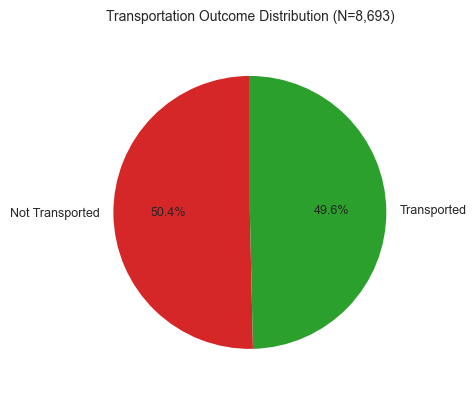

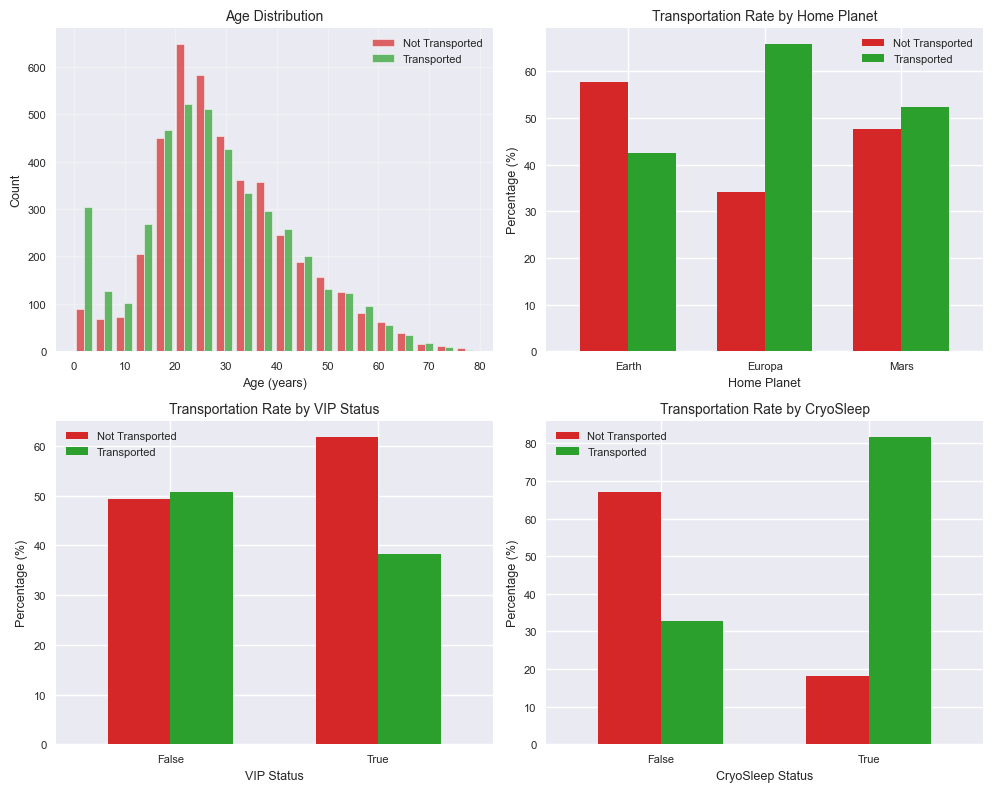

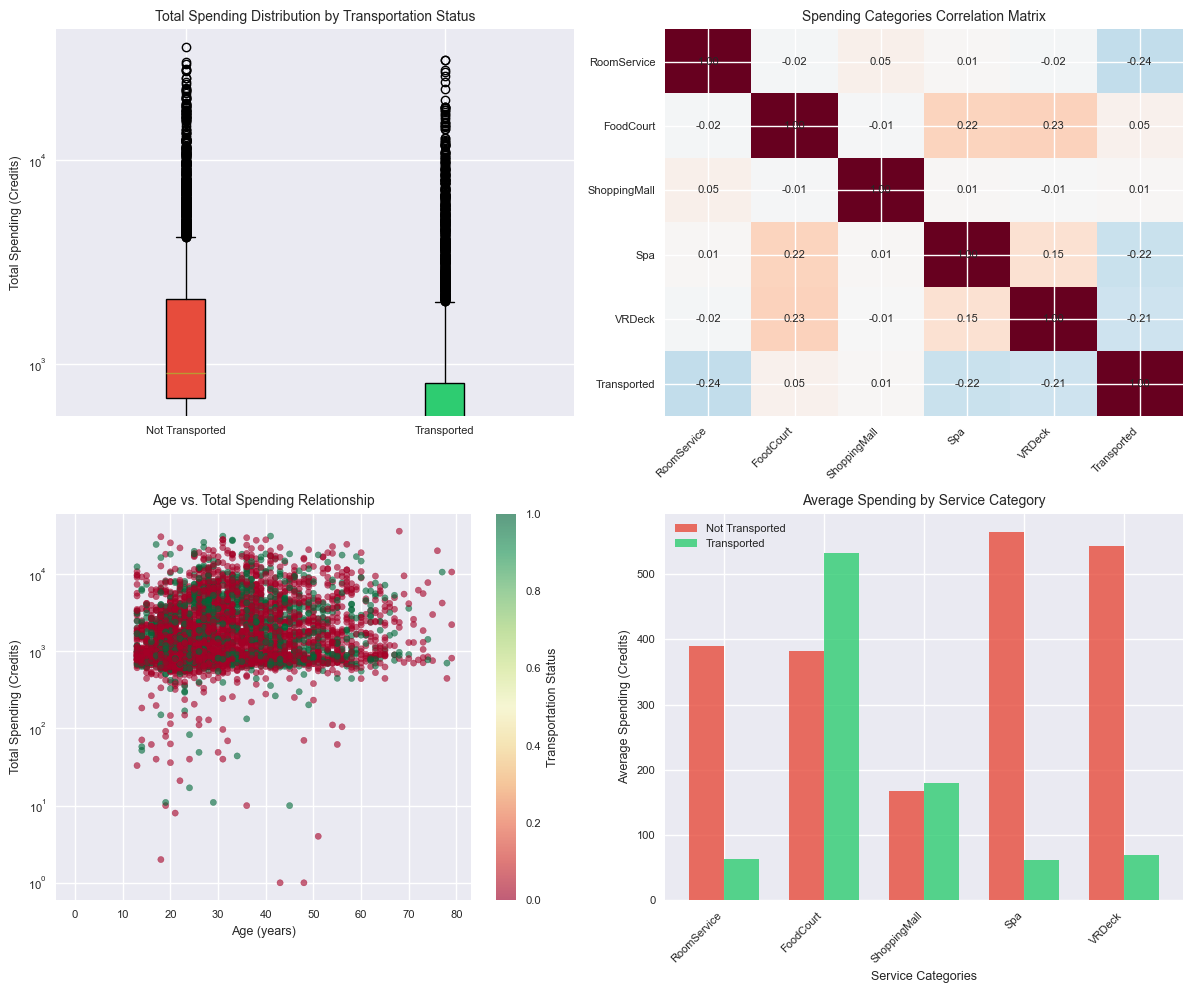

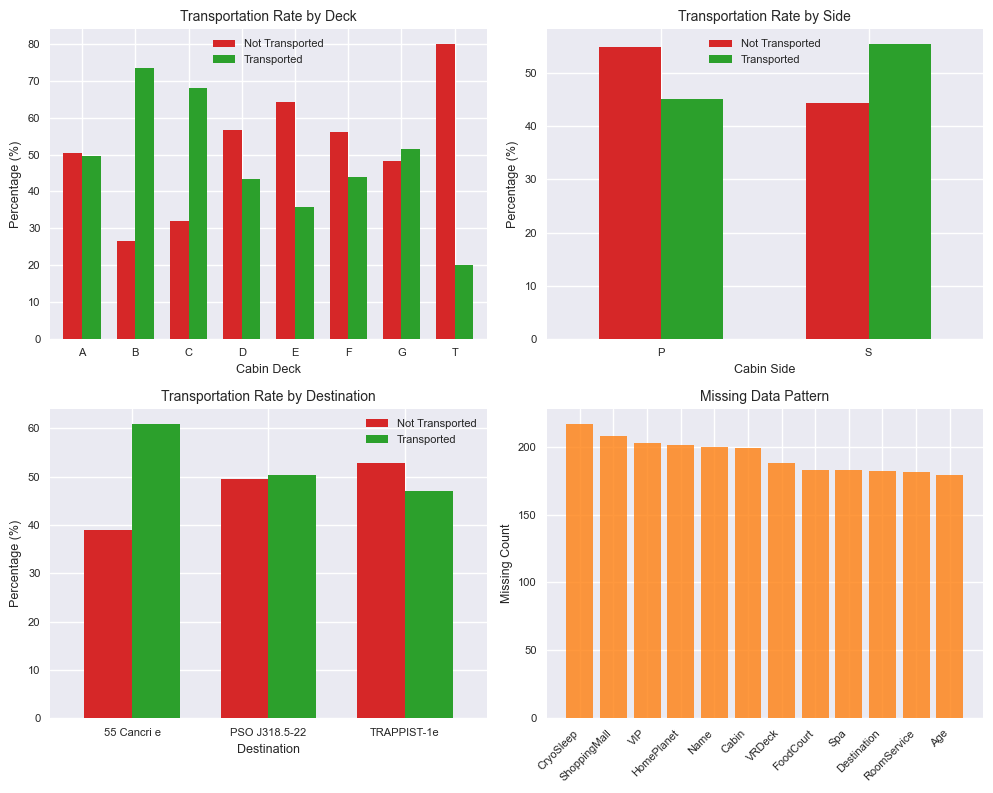

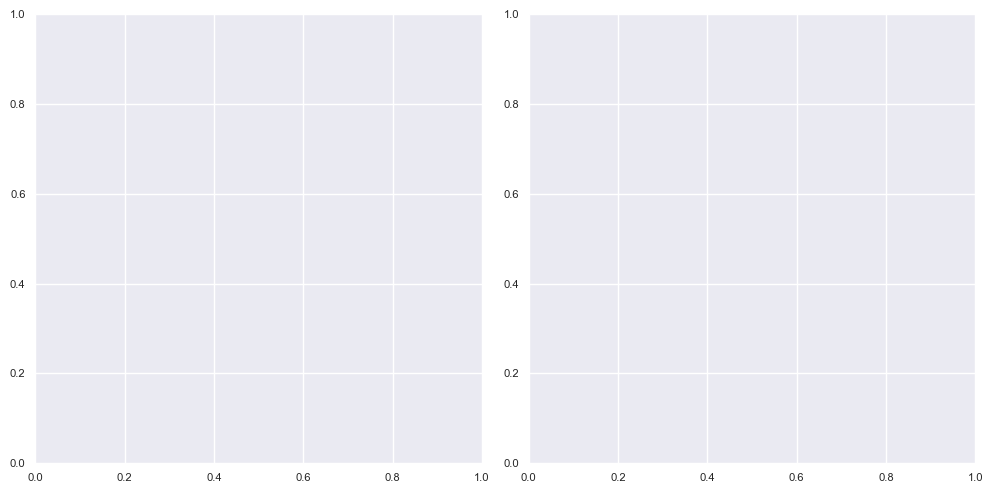

\nEDA Report Generation Complete!


In [28]:
# Generate complete report
figures = generate_complete_eda_report(df)
# etc.

In [16]:
df.head(10000)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
